In [ ]:
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Unsupervised learning packages
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Calculating distance between points
from scipy.spatial import distance
from scipy import stats


In [ ]:
df = pd.read_csv('/content/Data_f.csv')
print(df.shape)
df

(3734, 80)


,ID,NAME,Batting style,Bowling style,Playing role,BATTING_Tests_Mat,BATTING_Tests_Inns,BATTING_Tests_NO,BATTING_Tests_Runs,BATTING_Tests_HS,...,BOWLING_T20s_Inns,BOWLING_T20s_Balls,BOWLING_T20s_Runs,BOWLING_T20s_Wkts,BOWLING_T20s_Ave,BOWLING_T20s_Econ,BOWLING_T20s_SR,BOWLING_T20s_4w,BOWLING_T20s_5w,BOWLING_T20s_10
0,8918,A Armstrong,Right-hand bat,Right-arm fast-medium,NaN,5,8,0,59,20,...,0,0,0,0,0.0,0.00,0.0,0,0,0
1,51578,A Clarke,NaN,NaN,NaN,5,8,0,104,31,...,120,0,0,0,5.0,0.00,0.0,0,0,0
2,309217,A Keely,NaN,NaN,NaN,9,15,1,293,55,...,0,0,0,0,0.0,0.00,0.0,0,0,0
3,748791,A Kilkarni,Right-hand bat,NaN,NaN,44,61,7,1328,80,...,0,0,0,0,0.0,0.00,0.0,0,0,0
4,1036255,A King,Right-hand bat,NaN,NaN,1,2,1,17,17*,...,0,0,0,0,0.0,0.00,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3729,1159363,Zulqarnain,Right-hand bat,Right-arm medium,NaN,10,0,2,187,47,...,0,0,0,0,0.0,0.00,0.0,0,0,0
3730,1046641,Zulqarnain Haider,NaN,NaN,NaN,3,4,2,7,4*,...,0,0,0,0,0.0,0.00,0.0,0,0,0
3731,1050037,Zumika Azmi,Right-hand bat,Right-arm offbreak,NaN,3,4,0,24,13,...,0,0,0,0,0.0,0.00,0.0,0,0,0
3732,1114583,Zyad,NaN,NaN,NaN,7,0,5,51,25*,...,4,48,82,1,0.0,10.25,48.0,0,0,0


In [ ]:
inertia = []
for n in range(1,15):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(df[['BATTING_Tests_SR','BATTING_Tests_Ave']])
    inertia.append(kmeans.inertia_)

In [ ]:
silhouette = []
for n in range(2,15):
    kmeans = KMeans(n_clusters = n, random_state=7)
    kmeans.fit(df[['BATTING_Tests_SR','BATTING_Tests_Ave']])
    score = silhouette_score(df[['BATTING_Tests_SR','BATTING_Tests_Ave']],kmeans.labels_)
    silhouette.append(score)

Text(0.5, 1.0, 'silhouette scores')

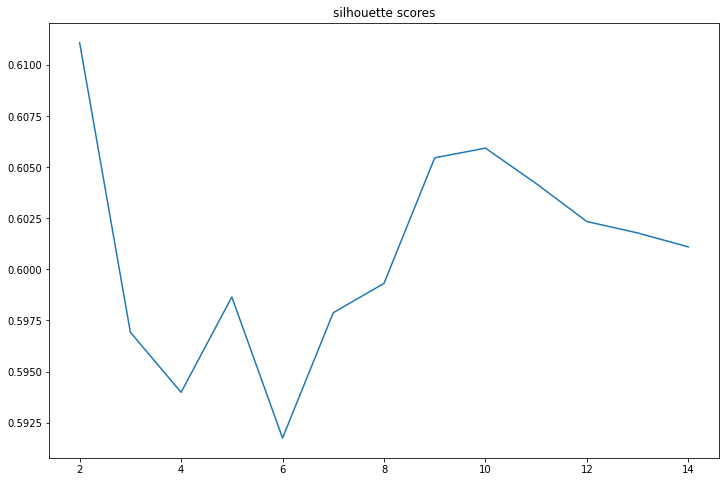

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(range(2,15),silhouette)
plt.title('silhouette scores')

In [ ]:
kmeans = KMeans(n_clusters = 8, random_state=7)
df['cluster'] = kmeans.fit_predict(df[['BATTING_Tests_SR','BATTING_Tests_Ave']])

In [ ]:
px.scatter(df,
           x='BATTING_Tests_SR',
           y='BATTING_Tests_Ave',
           hover_data=['NAME', 'BATTING_Tests_SR', 'BATTING_Tests_Ave'],
           color= 'cluster',
           title='The Eight Clusters')

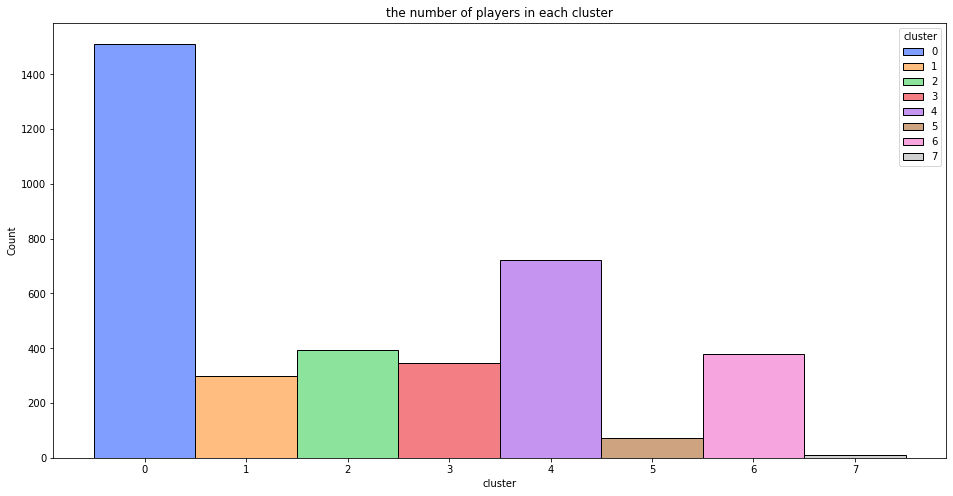

In [ ]:
plt.figure(figsize = (16,8))
p1 = sns.histplot(data=df, x='cluster', hue='cluster', legend=True, palette='bright',discrete=True, binwidth=5)
plt.title('the number of players in each cluster')
plt.show()

In [ ]:
px.scatter_3d(df,x='BATTING_Tests_BF',
              y='BATTING_Tests_Ave',
              z='BATTING_Tests_SR',
              hover_data=['NAME', 'BATTING_Tests_SR', 'BATTING_Tests_HS'],
              title='Scatterplot of Strike Rate, Average & Boundary Rate')

In [ ]:
def player_recommendation(name):
    recommendation = []
    a = df.loc[df['NAME']==name][['BATTING_Tests_SR','BATTING_Tests_Ave','BATTING_Tests_BF']]
    a = np.array(a)
    for num in df.index:
        b = df.loc[df.index==num][['BATTING_Tests_SR','BATTING_Tests_Ave','BATTING_Tests_BF']]
        b = np.array(b)
        c = distance.euclidean(a,b)
        recommendation.append([df.loc[df.index==num]['NAME'],c])
        recommendation.sort(key=lambda a: a[1])
    print(recommendation[1][1]) # Euclidean distance
    return df.loc[df['NAME'].isin([name, str(recommendation[1][0].values[0])]), ['NAME', 'BATTING_Tests_SR', 'BATTING_Tests_Ave',  'BATTING_Tests_BF', 'BATTING_Tests_Runs']]

In [ ]:
player_recommendation('Geoffrey Morton')

2355.0045297620977


,NAME,BATTING_Tests_SR,BATTING_Tests_Ave,BATTING_Tests_BF,BATTING_Tests_Runs
1038,Geoffrey Morton,42.51,52.31,31258,13288
2474,R Marland,45.97,55.37,28903,0
